In [1]:
%matplotlib inline
import networkx as nx # "nx" is a conventional alias for "networkx" when importing
import pandas as pd
import numpy as np
import warnings
import matplotlib as plt

warnings.filterwarnings("ignore") # To suppress matplotlib warning messages

In [2]:
ROUTES_PATH = 'data/air_routes.csv'
routes = pd.read_csv(ROUTES_PATH, usecols=['source','dest','count'])

routes.head()

source dest  count
0    AAE  ALG      1
1    AAE  CDG      1
2    AAE  IST      1
3    AAE  LYS      1
4    AAE  MRS      2

In [3]:
source_list = list(routes['source'].values)
dest_list = list(routes['dest'].values)

sor = set(source_list) 
dest = set(dest_list)

#print (sor.intersection(dest)  ) 
 
#print (sor.union(dest) )     
 
print (len(sor.union(dest)  - sor.intersection(dest)))
print (sor.union(dest)  - sor.intersection(dest))

23
{'KZB', 'BVS', 'UII', 'MSW', 'LJA', 'KZI', 'FMI', 'CMP', 'IUE', 'KPR', 'MTE', 'TUA', 'SPI', 'VDA', 'BSS', 'DLZ', 'SXX', 'QFX', 'STZ', 'CZJ', 'KYK', 'PTJ', 'ORX'}


In [4]:
test_routes = routes['source'].unique()
test_des = routes['dest'].unique()
#test_routes.append(test_des)
airport_codes = list(np.concatenate((test_routes, test_des)))

In [5]:
# create unique list of codes with GPS location. This will can be used to filtering in world airport gps locations. 
unique_codes = []
for n in airport_codes:
    if n not in unique_codes:
        unique_codes.append(n)
print(len(unique_codes))
#print(unique_codes)

3425


In [6]:
gps_path= 'data/Airport_Code_gps_location.txt'

gps_airport = pd.read_csv(gps_path)

gps_airport.head()

country_code      region_name iata  icao  \
0           AE     Ash Shariqah  SHJ  OMSJ   
1           AE         Abu Zaby  AZI  OMAD   
2           AE      Al Fujayrah  FJR  OMFJ   
3           AE         Abu Zaby  XSB  OMBY   
4           AE  Ra's al Khaymah  RKT  OMRK   

                                airport   latitude  longitude  
0         Sharjah International Airport  25.328600  55.517200  
1           Al Bateen Executive Airport  24.428301  54.458099  
2        Fujairah International Airport  25.112200  56.324001  
3                  Sir Bani Yas Airport  24.283611  52.580278  
4  Ras Al Khaimah International Airport  25.613501  55.938801

In [184]:
gps_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  8958 non-null   object 
 1   region_name   8990 non-null   object 
 2   iata          8989 non-null   object 
 3   icao          7792 non-null   object 
 4   airport       8990 non-null   object 
 5   latitude      8990 non-null   float64
 6   longitude     8990 non-null   float64
dtypes: float64(2), object(5)
memory usage: 491.8+ KB


In [178]:
def iata_code(XXX):
    '''
    Input:- airport iata code 'String' 'XXX'
    output:- 
    dataframe airport located value
    '''
    return gps_airport[gps_airport['iata']==XXX]

In [179]:
iata_code('RKT')

country_code      region_name iata  icao  \
4           AE  Ra's al Khaymah  RKT  OMRK   

                                airport   latitude  longitude  
4  Ras Al Khaimah International Airport  25.613501  55.938801

In [7]:
gps_path2= 'data/Airport_Code_gps_location2.txt'

gps_airport2 = pd.read_csv(gps_path2)

gps_airport2.head()

country_code     region_name iata  icao                airport   latitude  \
0           GB  United Kingdom  ACI  EGJA      The Blaye Airport  49.706111   
1           GL       Greenland  AGM  BGAM       Tasiilaq Airport  65.122220   
2           GL       Greenland  AOQ  BGAG    Aappilattoq Airport  72.883330   
3           CC   Cocos Islands  CCK  YPCC  Cocos Islands Airport -12.188333   
4           GG        Guernsey  GCI  EGJB       Guernsey Airport  49.434956   

   longitude  
0  -2.214722  
1 -37.618333  
2 -55.598000  
3  96.833889  
4  -2.601969

In [8]:
gps_codes = pd.concat([gps_airport, gps_airport2])
print(gps_codes.shape)

(9034, 7)


In [9]:
# grab gps codes from the gps_codes dataframe

latitude = []
longitude = []
for n in unique_codes:
    latitude.append(list(gps_codes[gps_codes['iata'] == n ]['latitude'])[0])
    longitude.append(list(gps_codes[gps_codes['iata'] == n ]['longitude'])[0])
    if n not in list(gps_codes['iata'].values):
        print('The gps code does not exist, search on internet and udpate the text file')
   


In [10]:
# sanity checks 
        
len(latitude) == len(longitude) == len(unique_codes)

True

In [11]:
print(len(unique_codes))

3425


In [12]:
# sanity check. 
# check if all the airport codes of routes are in gps_codes dataframe. 

unique_set= set(unique_codes)
gps_set = set(gps_codes['iata'].values)

print(len(unique_codes)) == print(len(unique_set.intersection(gps_set)))

# "True" all the airport codes of unique_codes are inside the gps_codes. 

3425
3425


True

In [13]:
## create df with gps codes from the gps_codes into new df. 

# update df for routes and add source long, lat and similiarly dest long and dest lat. 

routes_dist = pd.DataFrame(columns = ['source', 'dest', 'count','src_long', 'src_lat', 'dest_long', 'dest_lat'])


routes_dist['source'] = routes['source']
routes_dist['dest'] = routes['dest']
routes_dist['count'] = routes['count']



#routes_dist[['src_long', 'src_lat', 'dest_long', 'dest_lat']]

In [14]:
test = list(routes_dist['source'].unique())
#print(test)

# test_dest = list(routes_dist['dest'].unique())


In [15]:
# function to create unique list of shape and latitude/ longitude

shape_list = []

for n in test:
    mask = routes_dist[routes_dist['source'] == n]
    shape_list.append(mask.shape[0])
short_lat = []
short_long= []
for m in test:
    short_lat.append([list(gps_codes[gps_codes['iata'] == m]['latitude'])[0]])
    short_long.append([list(gps_codes[gps_codes['iata'] == m]['longitude'])[0]])


#print(shape_list)
#print(short_lat)


In [16]:
# create list of lat and long using the above function for short_lat and short_long. 

lat = []
long = []
for i, shape in enumerate(shape_list):
    lat.append(short_lat[i]*shape)
    long.append(short_long[i]*shape)
#print(lat)
#print(long)

In [17]:
# flatten the lists of lat and long

def flatten_list(name_list):
    return [item for sublist in name_list for item in sublist]


lat = flatten_list(lat)
long = flatten_list(long)


In [18]:
# update the df with the source long and lat
routes_dist['src_long'] = long
routes_dist['src_lat'] = lat


In [19]:
# sanity check with gps codes. Lat and long matches
routes_dist[routes_dist['source'] == 'AAN']['src_long'] 

20    55.6092
21    55.6092
Name: src_long, dtype: float64

In [20]:
gps_codes[gps_codes['iata']== 'AAN']

country_code region_name iata  icao                       airport  \
13           AE    Abu Zaby  AAN  OMAL  Al Ain International Airport   

    latitude  longitude  
13   24.2617    55.6092

In [21]:
# routes_dist.sort_values(by = ['dest'], inplace= True)
routes_dist.head()

source dest  count  src_long    src_lat dest_long dest_lat
0    AAE  ALG      1  7.809174  36.822201       NaN      NaN
1    AAE  CDG      1  7.809174  36.822201       NaN      NaN
2    AAE  IST      1  7.809174  36.822201       NaN      NaN
3    AAE  LYS      1  7.809174  36.822201       NaN      NaN
4    AAE  MRS      2  7.809174  36.822201       NaN      NaN

## udpate the destination gps locations. 

In [22]:
## udpate the destination gps locations. using same steps as source gps locations. 



#%%time

# sort the dataframe with respect to dest
routes_dist.sort_values(by = ['dest'], inplace= True)


# prepare the list of unique airport codes used in destination. 
test_dest = list(routes_dist['dest'].unique())

#print(len(test_dest))
## crab the shape of each airport in dest column of routes_dist['dest']
shape_dest_list = []

for n in test_dest:
    mask = routes_dist[routes_dist['dest'] == n]
    shape_dest_list.append(mask.shape[0])

#print(shape_dest_list)
# populate the latitude and longitude data from gps_codes file into dest_lat and dest_long
dest_lat = []
dest_long= []
for m in test_dest:
    dest_lat.append([list(gps_codes[gps_codes['iata'] == m]['latitude'])[0]])
    dest_long.append([list(gps_codes[gps_codes['iata'] == m]['longitude'])[0]])


# # create list of lat and long using the above function for dest_lat and dest_long. The data is shortened form
# # update, the cells below multiplies shape with latitude and longitude. To match the lenghts of the df

lat_dest = []
long_dest = []
for i, shape in enumerate(shape_dest_list):
    lat_dest.append(dest_lat[i]*shape)
    long_dest.append(dest_long[i]*shape)



# ## flatten the lists
lat_dest = flatten_list(lat_dest)
long_dest = flatten_list(long_dest)


# ## update the dataframe with the new values of dest long and dest lat

# # # update the df with the source long and lat
routes_dist['dest_long'] = long_dest
routes_dist['dest_lat'] = lat_dest

# rest the dataframe with source column and rearrange 
routes_dist = routes_dist.reset_index(drop = True)
routes_dist.sort_values(by = ['source'], inplace= True)
#routes_dist.head(25)

In [23]:
routes_dist.head()

source dest  count  src_long    src_lat  dest_long   dest_lat
1100     AAE  ALG      1  7.809174  36.822201   3.215410  36.691002
25480    AAE  ORN      1  7.809174  36.822201  -0.621183  35.623901
16200    AAE  IST      1  7.809174  36.822201  28.751944  41.275278
22825    AAE  MRS      2  7.809174  36.822201   5.221424  43.439272
25583    AAE  ORY      2  7.809174  36.822201   2.379444  48.723333

In [24]:
#sanity check random pick of destination 'ALG'
gps_codes[gps_codes['iata']== 'ALG']['latitude'].unique()[0] == routes_dist[routes_dist['dest'] == 'ALG']['dest_lat'].unique()[0]

True

In [25]:
#sanity check random pick of destination 'ORY'
gps_codes[gps_codes['iata']== 'ORY']['longitude'].unique()[0] == routes_dist[routes_dist['dest'] == 'ORY']['dest_long'].unique()[0]

True

## calculate distance between source and destintion. 

In [26]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(51.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)
print("Should be:", 278.546, "km")

Result: 309.9431738047906
Should be: 278.546 km


In [27]:
routes_dist.columns

Index(['source', 'dest', 'count', 'src_long', 'src_lat', 'dest_long',
       'dest_lat'],
      dtype='object')

In [28]:
from math import sin, cos, sqrt, atan2, radians

#pull the values of dataframe using list. This method is faster than pulling each time from dataframe. 
list_lat1 = list(routes_dist['src_lat'].values)
list_lon1 = list(routes_dist['src_long'].values)
list_lat2 = list(routes_dist['dest_lat'].values)
list_lon2 = list(routes_dist['dest_long'].values)


dist = []
for n in range(routes_dist.shape[0]):
    # approximate radius of earth in km
    R = 6373.0
    
    # convert each row value of long/lat into radians
    lat1 = round((radians(list_lat1[n])), 7)
    #print(lat1)
    lon1 = round((radians(list_lon1[n])), 7)
    #print(lon1)
    lat2 = round((radians(list_lat2[n])), 7)
    #print(lat2)
    lon2 = round((radians(list_lon2[n])), 7)
    #print(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dist.append(round((R * c), 3))


In [29]:
routes_dist[:5]

source dest  count  src_long    src_lat  dest_long   dest_lat
1100     AAE  ALG      1  7.809174  36.822201   3.215410  36.691002
25480    AAE  ORN      1  7.809174  36.822201  -0.621183  35.623901
16200    AAE  IST      1  7.809174  36.822201  28.751944  41.275278
22825    AAE  MRS      2  7.809174  36.822201   5.221424  43.439272
25583    AAE  ORY      2  7.809174  36.822201   2.379444  48.723333

In [30]:
routes_dist['dist'] = dist

In [31]:
routes_dist.tail()

source dest  count    src_long  src_lat   dest_long   dest_lat      dist
35700    ZYI  XIY      1  107.000700  27.5895  108.751999  34.447102   780.780
8001     ZYI  CTU      1  107.000700  27.5895  103.946999  30.578501   445.646
35792    ZYI  XMN      1  107.000700  27.5895  118.127998  24.544001  1161.716
7771     ZYI  CSX      1  107.000700  27.5895  113.220001  28.189199   614.982
8365     ZYL  DAC      4   91.866798  24.9632   90.397783  23.843347   194.051

In [32]:
## convert the data into networkx graphs to calculate the shortest distance between each airports. 

## mark the positions of each airport on the networkx use poisiton plot. See if the tuple can be used for locating the position. 
## refer the previous AI file and map them on the world map. 

'''
Pending activities. 
1. position and map to the world map. 
2. limit the number of nodes to 1000 first and see if the map can be generated
3. calculate the shortest distance between two locations. 
4. populate to rest of the airports. 

'''

'\nPending activities. \n1. position and map to the world map. \n2. limit the number of nodes to 1000 first and see if the map can be generated\n3. calculate the shortest distance between two locations. \n4. populate to rest of the airports. \n\n'

In [33]:
import geopandas as gp
import matplotlib.pyplot as plt

In [34]:
# create dataframe with longtitude and latitude along with airport codes

df = pd.DataFrame(
{ 
 'iata': unique_codes,
 'latitude': latitude,
 'longitude': longitude    
})

In [35]:
gdf = gp.GeoDataFrame(
    df, geometry=gp.points_from_xy(df.longitude, df.latitude))

In [36]:
df.head()

iata   latitude  longitude                   geometry
0  AAE  36.822201   7.809174   POINT (7.80917 36.82220)
1  AAL  57.092759   9.849243   POINT (9.84924 57.09276)
2  AAN  24.261700  55.609200  POINT (55.60920 24.26170)
3  AAQ  45.002102  37.347301  POINT (37.34730 45.00210)
4  AAR  56.299999  10.619000  POINT (10.61900 56.30000)

In [37]:
#G = nx.from_pandas_edgelist(routes_dist, source= 'source', target = 'dest', edge_attr = 'count')
G = nx.from_pandas_edgelist(routes_dist, source = 'source', target = 'dest', edge_attr = 'count')
#G = nx.Graph()

In [38]:
for n in range(len(df['iata'])):
    G.add_node(df['iata'][n], pos=(df['longitude'][n], df['latitude'][n]))

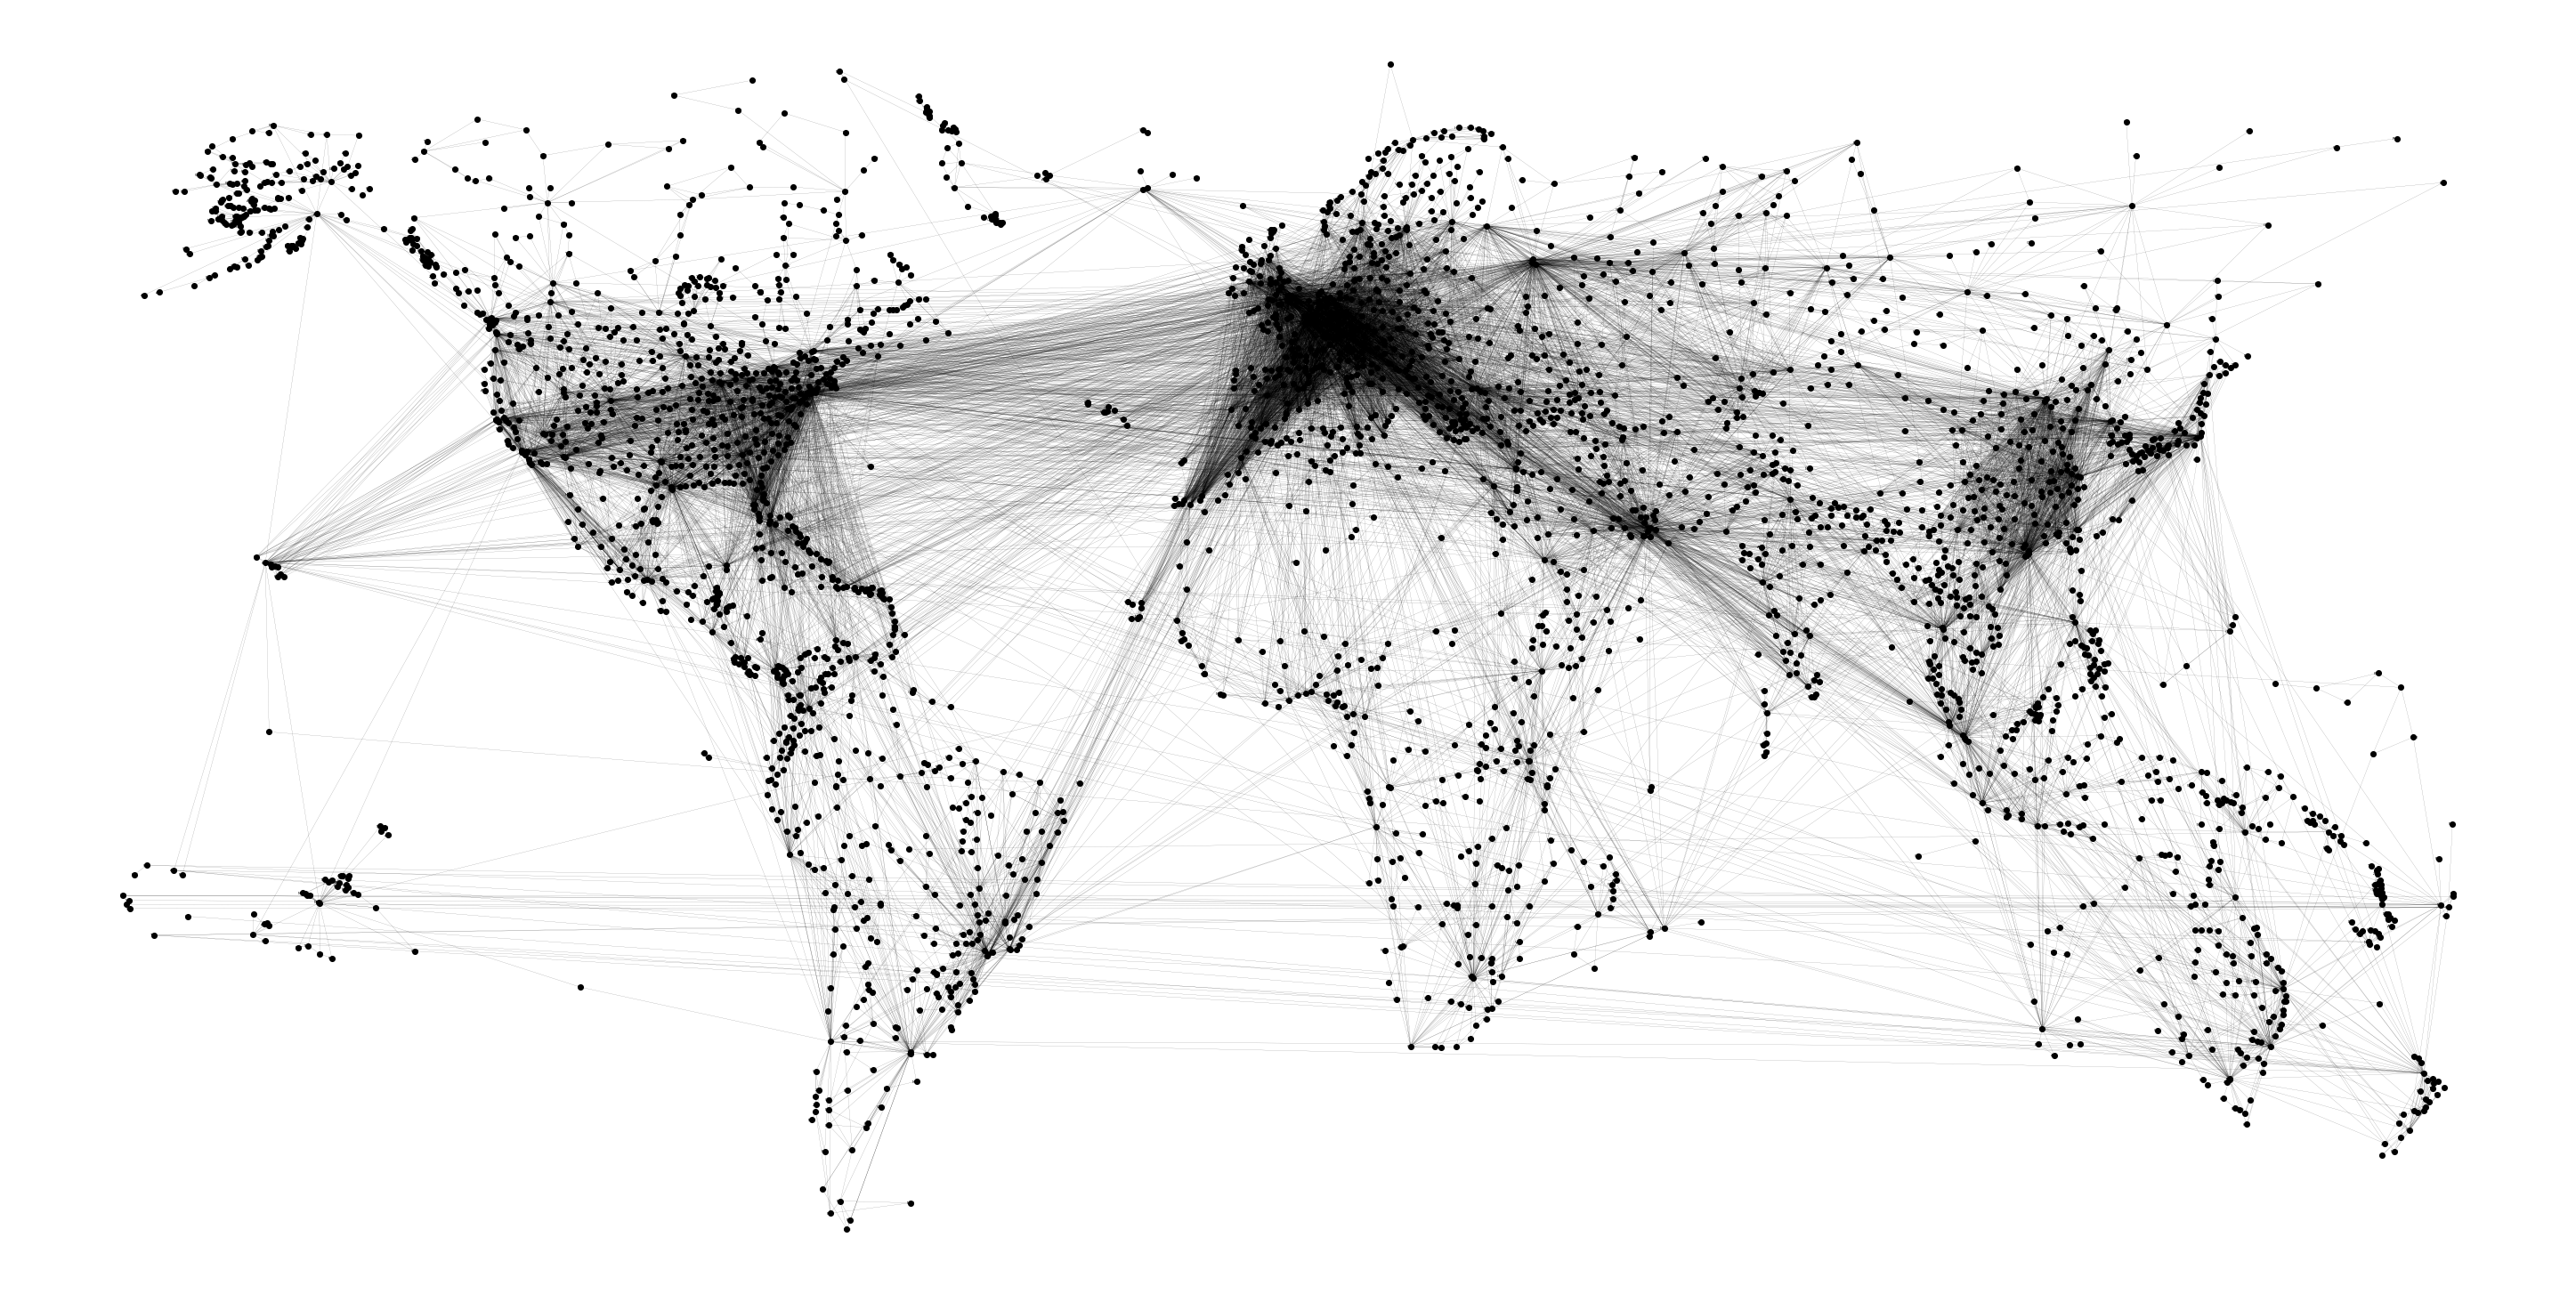

In [39]:
options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
    'font_size':4,
}

plt.rcParams['figure.figsize'] = (40, 20)


#G = nx.from_pandas_edgelist(routes, source= 'source', target = 'dest', edge_attr = 'count')
nx.draw(G,nx.get_node_attributes(G,'pos'), with_labels=True, **options)
#plt.draw()


In [41]:
routes_dist.columns

Index(['source', 'dest', 'count', 'src_long', 'src_lat', 'dest_long',
       'dest_lat', 'dist'],
      dtype='object')

In [42]:
# nx.from_pandas_edgelist(routes_dist, source = 'source', target = 'dest', edge_attr = 'count', ['dist'])

#nx.from_pandas_edgelist?
print(df.shape)
print(routes_dist.shape)

(3425, 4)
(37595, 8)


## another way of trying this out

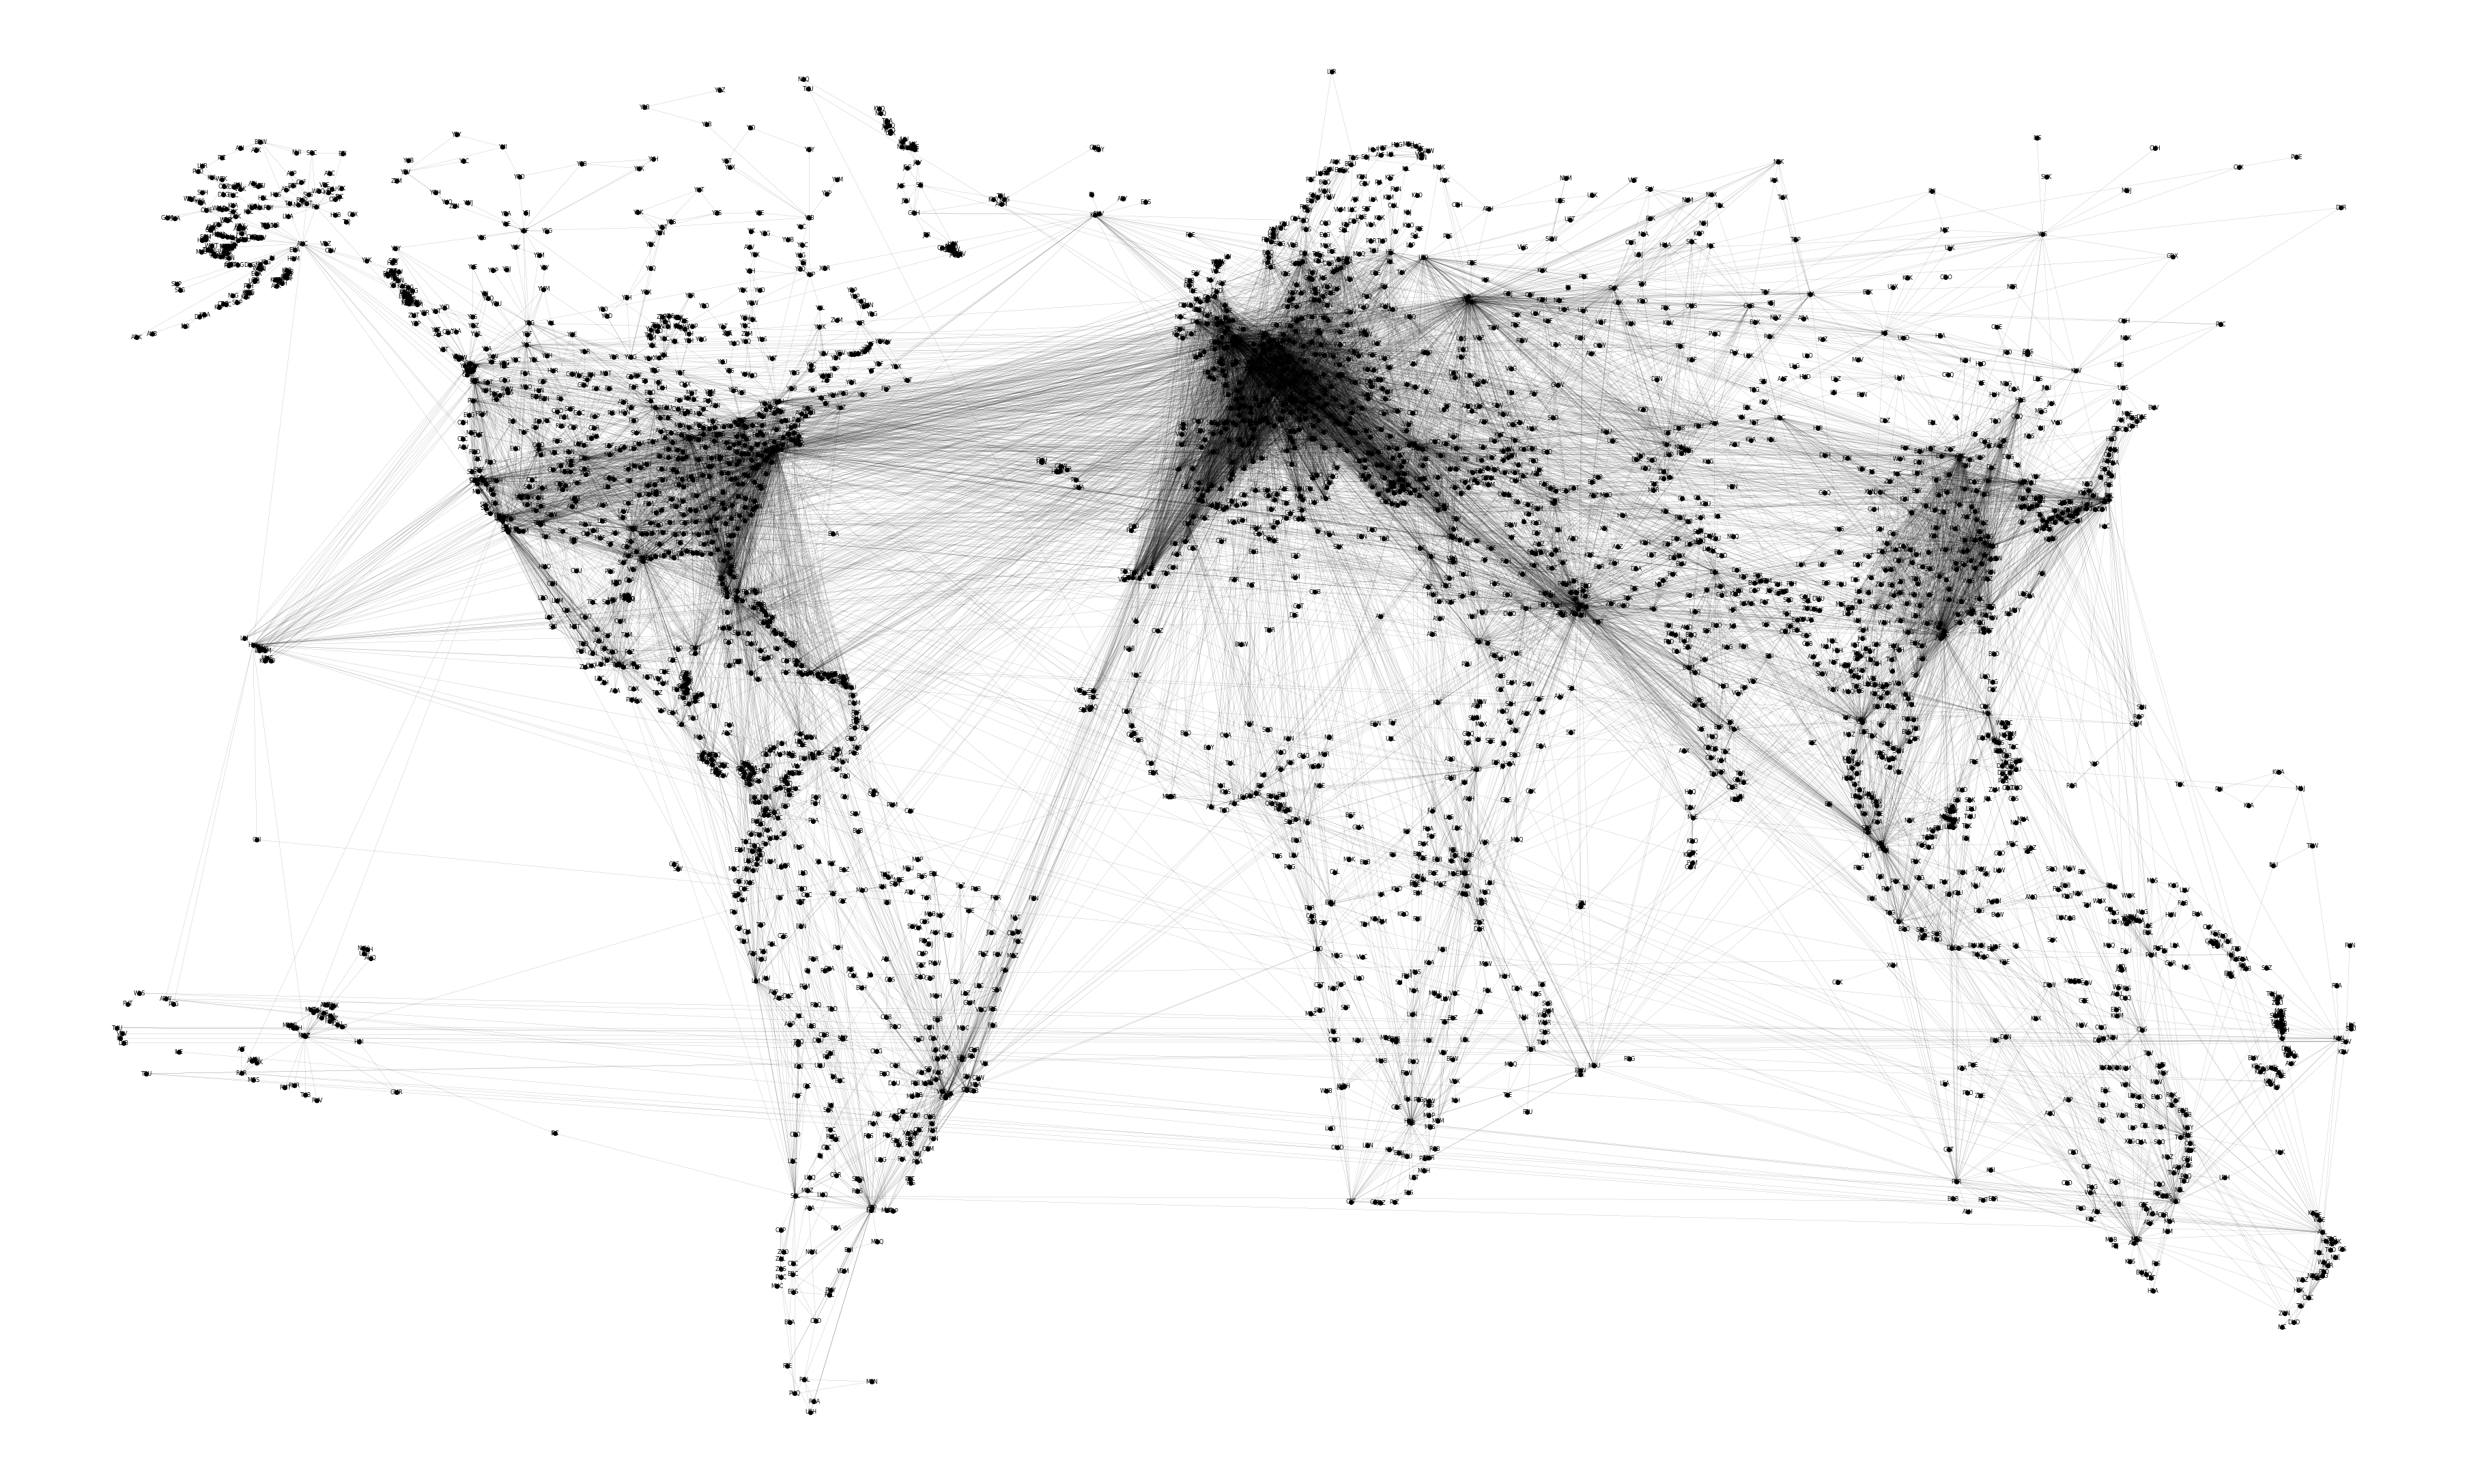

In [43]:
options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
    'font_size':8,
}

plt.rcParams['figure.figsize'] = (50, 30)

edges = pd.DataFrame({'source': routes_dist['source'] ,
                       'target': routes_dist['dest'],
                       'length': routes_dist['dist'],
                       'count':routes_dist['count'],
                       'color': 'b'})
Gx = nx.from_pandas_edgelist(edges, edge_attr=True)

for n in range(len(df['iata'])):
    Gx.add_node(df['iata'][n], pos=(df['longitude'][n], df['latitude'][n]))
    

nx.draw(Gx,nx.get_node_attributes(Gx,'pos'), with_labels=True, **options)


In [44]:
list(nx.shortest_paths.all_shortest_paths(Gx, 'IAH', 'PVG'))

[['IAH', 'AMS', 'PVG'],
 ['IAH', 'CDG', 'PVG'],
 ['IAH', 'DOH', 'PVG'],
 ['IAH', 'DTW', 'PVG'],
 ['IAH', 'DXB', 'PVG'],
 ['IAH', 'EWR', 'PVG'],
 ['IAH', 'FRA', 'PVG'],
 ['IAH', 'HNL', 'PVG'],
 ['IAH', 'SEA', 'PVG'],
 ['IAH', 'IST', 'PVG'],
 ['IAH', 'SFO', 'PVG'],
 ['IAH', 'LAX', 'PVG'],
 ['IAH', 'YYZ', 'PVG'],
 ['IAH', 'YVR', 'PVG'],
 ['IAH', 'PEK', 'PVG'],
 ['IAH', 'MUC', 'PVG'],
 ['IAH', 'ORD', 'PVG'],
 ['IAH', 'ICN', 'PVG'],
 ['IAH', 'LHR', 'PVG'],
 ['IAH', 'NRT', 'PVG']]

In [45]:
(routes_dist[routes_dist['source'] == 'IAH'][routes_dist['dest'] == 'AMS']['dist']).values[0]

8051.819

In [46]:
(routes_dist[routes_dist['source'] == 'AMS'][routes_dist['dest'] == 'PVG']['dist']).values[0]

8913.249

In [137]:
## function to find the shortest distance & number of stops between airports. 


def short_dist(flight_list):
    '''
    Input
    flight_list = varied lengths of the list and also contains sublists. 
    
    Output:
    shortest route and distance
    longest route and distance
    
    '''
    total_dist = []
    
    for n in flight_list:
        test1 = n[:-1]
        test2 = n[1 :] 
        comb_test = zip(test1, test2)
        tuple_comb = list(comb_test)
        #print(tuple_comb)
        dist1= []
        for n,m in tuple_comb:
            #print(n,m)
            dist1.append((routes_dist[routes_dist['source'] == n][routes_dist['dest'] == m]['dist']).values[0])
            #print(dist1)
        total_dist.append(sum(dist1))

    # create a dataframe to sort the distances
    d = {'airports': flight_list, 'distance': total_dist}
    df = pd.DataFrame(data=d)

    # sort the least distance
    df.sort_values('distance', inplace= True, ignore_index=True)

    # select the least distance row
    return df[:1], df[-1:]    
    
    
    

In [149]:
try_list = list(nx.shortest_paths.all_shortest_paths(Gx, 'AEY', 'IAH'))

In [163]:
## shortest distance between two airports. 

#print('distance',(short_dist(try_list)[0]))
print('number of stops', len(try_list[0]))

number of stops 6


In [162]:
short_dist(try_list)[0]

airports  distance
0  [AEY, RKV, GOH, KEF, YYZ, IAH]  9311.672

In [158]:
len(try_list[0])

6

In [151]:
## longest distance between two airports

short_dist(try_list)[-1]

airports   distance
11  [AEY, RKV, GOH, KEF, MUC, IAH]  14473.385

In [51]:
## degree of centrality 
degree_centrality = nx.degree_centrality(Gx)

max_key = max(degree_centrality, key=degree_centrality.get)
print(max_key)
print(degree_centrality[max_key])

AMS
0.07242990654205607


In [52]:
## degree of centrality 

min_key = min(degree_centrality, key=degree_centrality.get)
print(min_key)
print(degree_centrality[min_key])


AAT
0.0002920560747663551


## Top 5 high Eigenvector centrality nodes. 


Most connected airport. High Eigenvector centrality indicates that the 
airport is well connected to highly connected nodes.
Eigenvector centrality is a measure of the influence a node has on a network. 

https://en.wikipedia.org/wiki/Eigenvector_centrality

In [74]:
ict_eigenvector = nx.algorithms.centrality.eigenvector_centrality(Gx, max_iter= 100)

# convert the data into dataframe
data = sorted((v, '{:0.5f}'.format(c)) for v, c in dict_eigenvector.items())
df_eigenvector = pd.DataFrame(data, columns =['IATA', 'Score'])
df_eigenvector['Score']= df_eigenvector['Score'].astype(float)
#df_eigenvector.info()
df_eigenvector.nlargest(5, columns= 'Score')

IATA    Score
110   AMS  0.16785
890   FRA  0.16639
463   CDG  0.15945
1930  MUC  0.14851
853   FCO  0.13633

## The Closeness Centrality

Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.

The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes

https://neo4j.com/docs/graph-algorithms/current/labs-algorithms/closeness-centrality/#:~:text=Closeness%20centrality%20is%20a%20way,distances%20to%20all%20other%20nodes.

In [89]:
dict_closeness= nx.algorithms.centrality.closeness_centrality(Gx, distance= 'length')

data_closeness= sorted((v, '{:0.8f}'.format(c)) for v, c in dict_closeness.items())
df_closeness = pd.DataFrame(data_closeness, columns =['IATA', 'Score'])
df_closeness['Score']= df_closeness['Score'].astype(float)
#df_eigenvector.info()
df_closeness.nlargest(5, columns= 'Score')

IATA     Score
110  AMS  0.000130
575  CPH  0.000130
313  BLL  0.000129
739  DUS  0.000129
994  GOT  0.000129

## Betweeness Centrality

The betweeness centrality is a measure of crentrality in a graph based
on shortest paths. Vertices with high betweeness may have considerable 
influence within a network by virtue of thier control over information 
passing between others. 

https://www.sci.unich.it/~francesc/teaching/network/betweeness.html#:~:text=Betweenness%20centrality%20measures%20the%20extent,over%20information%20passing%20between%20others.

In [91]:
dict_betweeness = nx.algorithms.centrality.betweenness_centrality(Gx)

data_betweeness= sorted((v, '{:0.8f}'.format(c)) for v, c in dict_betweeness.items())
df_betweeness = pd.DataFrame(data_betweeness, columns =['IATA', 'Score'])
df_betweeness['Score']= df_betweeness['Score'].astype(float)
df_betweeness.nlargest(5, columns= 'Score')

IATA     Score
111   ANC  0.072483
1573  LAX  0.065208
463   CDG  0.061936
744   DXB  0.056488
890   FRA  0.051086

## Load Centrality

In [97]:
dict_load = nx.algorithms.centrality.load_centrality(Gx, weight='length')


In [98]:
data_load= sorted((v, '{:0.8f}'.format(c)) for v, c in dict_load.items())
df_load = pd.DataFrame(data_load, columns =['IATA', 'Score'])
df_load['Score']= df_load['Score'].astype(float)
df_load.nlargest(5, columns= 'Score')

IATA     Score
1392  KEF  0.085210
2542  SEA  0.080321
111   ANC  0.072170
2200  PEK  0.059557
1249  IST  0.046898

## Shortest path based on distance (dijkstra_path)

In [131]:
def single_source_path_graph(Graph, source, target, weight):
    '''
    Input:
    Graph = networkx graph
    source= start point (string--> IATA code)
    target = end point (string--> IATA code)
    weight = Distance or length (string--> weight)
    
    output
    list of shortest paths   
    
    '''
    
    dist, path_list = nx.algorithms.shortest_paths.weighted.single_source_dijkstra(Graph, source, target, weight=weight)
    
    return dist, path_list

In [142]:
dist, path_list = single_source_path_graph(Gx, 'HYD', 'IAH', 'length')

print('Distance', dist)
print('Path list', path_list)

Distance 14784.251
Path list ['HYD', 'DEL', 'ORD', 'IAH']


In [148]:
dist, path_list = single_source_path_graph(Gx, 'AEY', 'IAH', 'length')

print('Distance', dist)
print('Path list', path_list)

Distance 9311.672
Path list ['AEY', 'RKV', 'GOH', 'KEF', 'YYZ', 'IAH']


In [183]:
iata_code('GOH')

country_code               region_name iata  icao       airport  \
3252           GL  Kommuneqarfik Sermersooq  GOH  BGGH  Nuuk Airport   

       latitude  longitude  
3252  64.190903 -51.678101